In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot

# Loading data

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

https://github.com/ResidentMario/missingno

In [2]:
data_folder_path = Path(r'..\data')
df = pd.read_csv(
    data_folder_path / 'Motor Vehicle Collisions.csv',
    parse_dates={'DATETIME':[0,1]},
).astype(
    {
        'BOROUGH':'category',
        'ZIP CODE':'category',
        'ON STREET NAME':'category',
        'CROSS STREET NAME':'category',
        'OFF STREET NAME':'category',
        'CONTRIBUTING FACTOR VEHICLE 1': 'category',
        'CONTRIBUTING FACTOR VEHICLE 2': 'category',
        'CONTRIBUTING FACTOR VEHICLE 3': 'category',
        'CONTRIBUTING FACTOR VEHICLE 4': 'category',
        'CONTRIBUTING FACTOR VEHICLE 5': 'category',
        'VEHICLE TYPE CODE 1':'category',
        'VEHICLE TYPE CODE 2':'category',
        'VEHICLE TYPE CODE 3':'category',
        'VEHICLE TYPE CODE 4':'category',
        'VEHICLE TYPE CODE 5':'category',
    }
).drop(columns=['LOCATION'])

# Information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 24 columns):
DATETIME                         7303 non-null datetime64[ns]
BOROUGH                          6920 non-null category
ZIP CODE                         6919 non-null category
LATITUDE                         7303 non-null float64
LONGITUDE                        7303 non-null float64
ON STREET NAME                   6238 non-null category
CROSS STREET NAME                6166 non-null category
OFF STREET NAME                  761 non-null category
NUMBER OF PERSONS INJURED        7303 non-null int64
NUMBER OF PERSONS KILLED         7303 non-null int64
NUMBER OF PEDESTRIANS INJURED    7303 non-null int64
NUMBER OF PEDESTRIANS KILLED     7303 non-null int64
NUMBER OF CYCLISTS INJURED       0 non-null float64
NUMBER OF CYCLISTS KILLED        0 non-null float64
CONTRIBUTING FACTOR VEHICLE 1    7303 non-null category
CONTRIBUTING FACTOR VEHICLE 2    6218 non-null category
CONTRIBUTING F

In [44]:
df.head()

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2016-11-10 16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,WORTMAN AVENUE,MONTAUK AVENUE,NaN,0,0,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,2016-11-10 05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,HUBERT STREET,HUDSON STREET,NaN,1,0,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,2016-04-16 09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,HENRY STREET,WARREN STREET,NaN,0,0,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,2016-04-15 10:20:00,QUEENS,11375.0,40.719228,-73.854542,NaN,NaN,67-64 FLEET STREET,0,0,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,2016-04-15 10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,BEDFORD AVENUE,CAMPUS ROAD,NaN,0,0,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


# Visualizing missing values

## Bar chart

This shows the proportion of non-missing values per columns

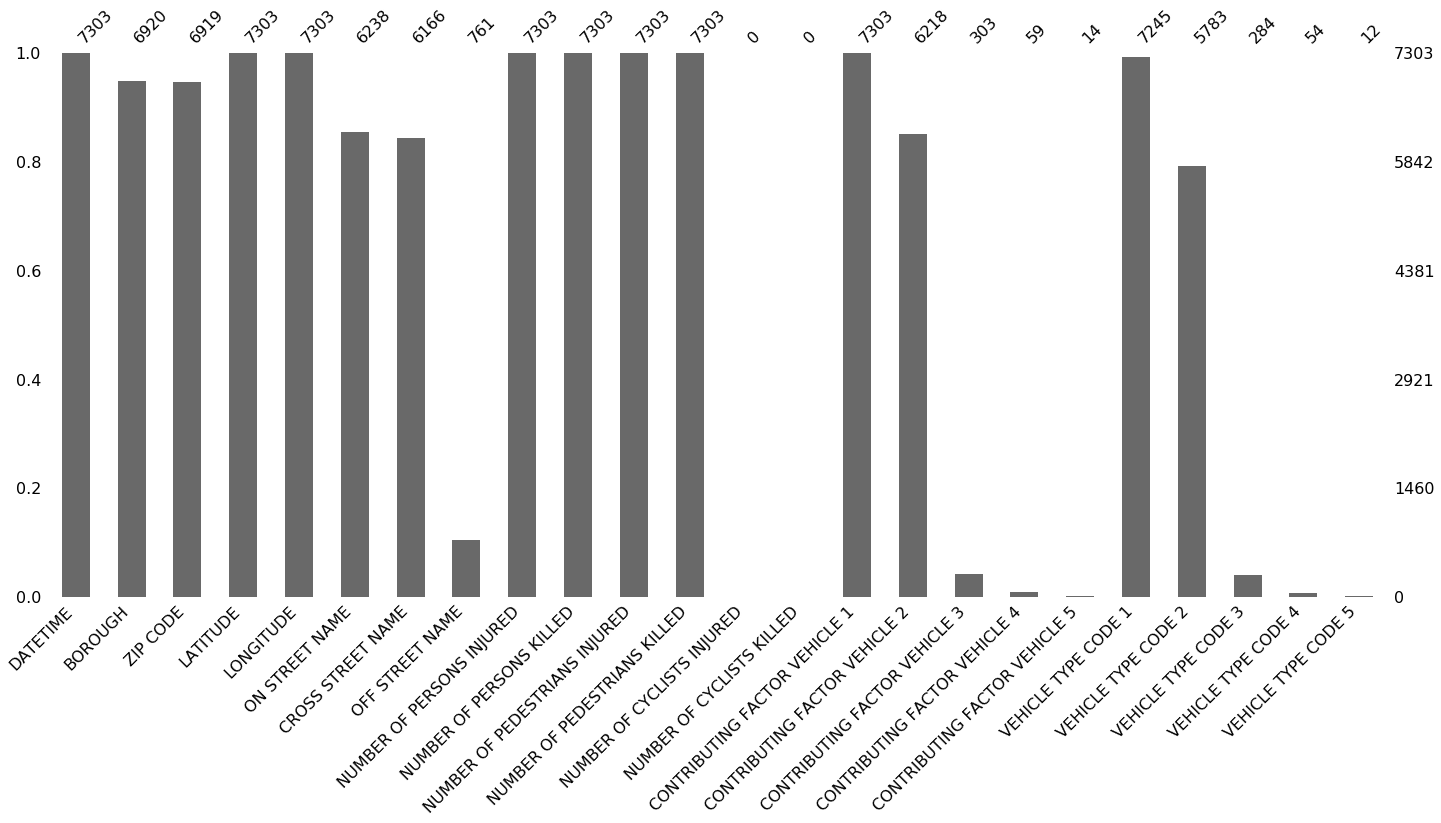

In [48]:
msno.bar(df)

## Matrix

Visualizes the missing values (white) per rows and columns

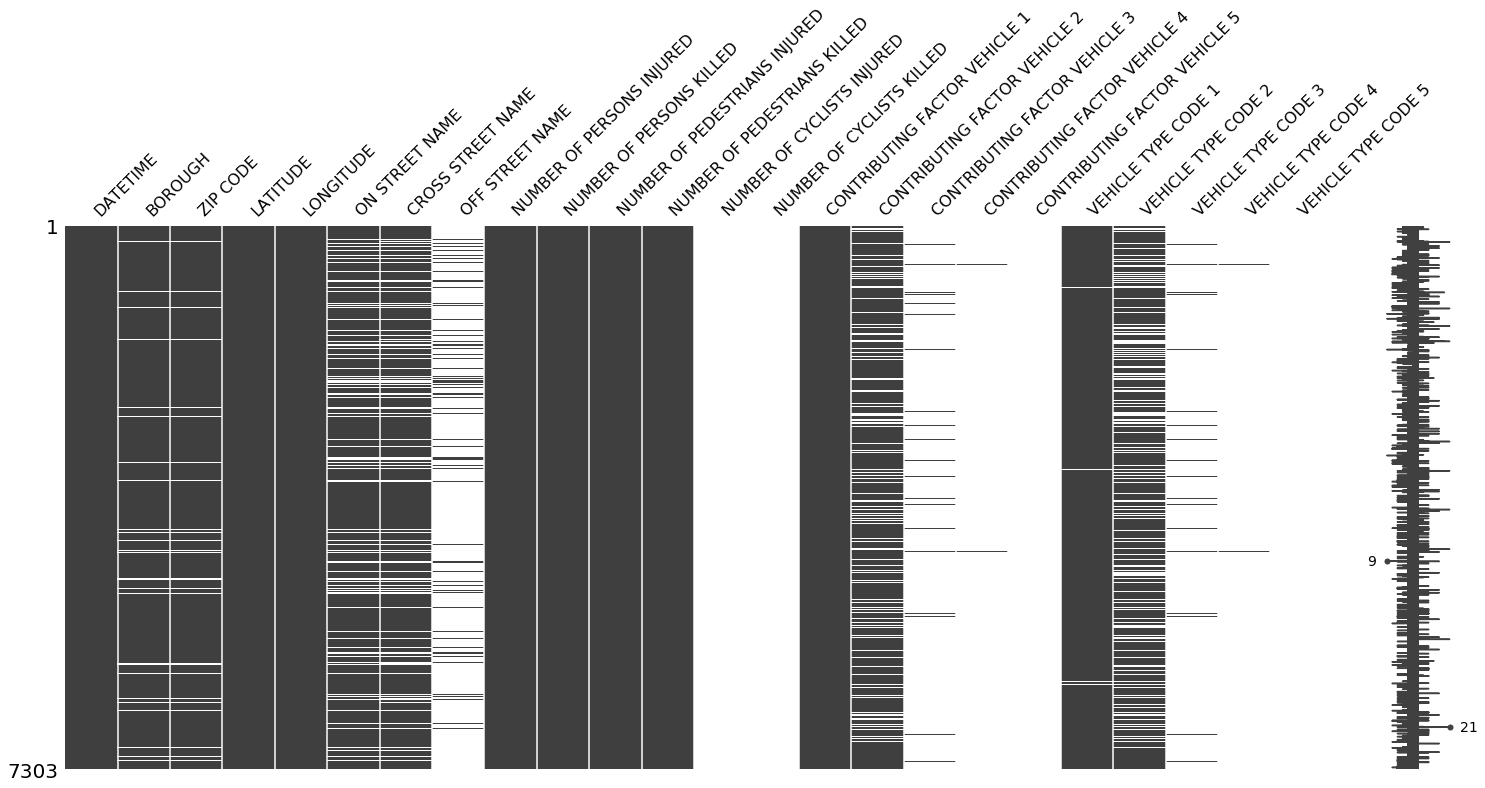

In [47]:
msno.matrix(df)

# Exploring when missing values appear together

First we create a dataframe that indicates whether the values are missing or not

In [6]:
is_null_df = df.isnull()
is_null_df.head()

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True


In [31]:
df.columns

Index(['DATETIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLISTS INJURED', 'NUMBER OF CYCLISTS KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

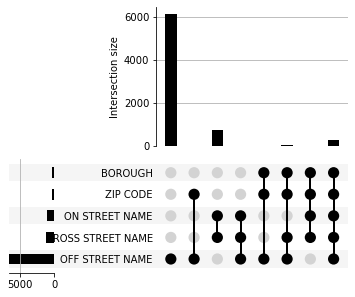

In [36]:
upsetplot.plot(
    is_null_df.groupby([
        'BOROUGH', 'ZIP CODE', 'ON STREET NAME','CROSS STREET NAME','OFF STREET NAME',
        #'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
        #'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
        #'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
        #'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
        #'VEHICLE TYPE CODE 5'
    ]).size()
);

### Using Jaccard index



In [102]:
# counting how many times a missing value appears in both colums
(is_null_df['ON STREET NAME'] & is_null_df['CROSS STREET NAME']).sum() / (is_null_df['ON STREET NAME'] | is_null_df['CROSS STREET NAME']).sum()

0.9366754617414248

In [115]:
# the same with sklearn
from sklearn.metrics import jaccard_score

jaccard_score(is_null_df['ON STREET NAME'], is_null_df['CROSS STREET NAME'], average='binary')

0.9366754617414248

In [139]:
missing_values_frequency_matrix = pd.DataFrame(
    np.zeros(shape=(is_null_df.shape[1],is_null_df.shape[1])),
    index=is_null_df.columns,
    columns=is_null_df.columns,
)
for i in range(0, is_null_df.shape[1] - 1):
    for j in range(i + 1, is_null_df.shape[1]):
        try:
            missing_values_frequency_matrix.iloc[i,j] = jaccard_score(is_null_df.iloc[:,i], is_null_df.iloc[:,j])
        except:
            pass

In [140]:
missing_values_frequency_matrix

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATETIME,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BOROUGH,0.0,0.0,0.997396,0.0,0.0,0.266842,0.329834,0.057575,0.0,0.0,...,0.0,0.004791,0.051709,0.052581,0.052401,0.006849,0.043884,0.051869,0.052690,0.052386
ZIP CODE,0.0,0.0,0.000000,0.0,0.0,0.266608,0.329545,0.057728,0.0,0.0,...,0.0,0.004788,0.051852,0.052719,0.052538,0.006834,0.043860,0.052011,0.052828,0.052523
LATITUDE,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LONGITUDE,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ON STREET NAME,0.0,0.0,0.000000,0.0,0.0,0.000000,0.936675,0.041627,0.0,0.0,...,0.0,0.037144,0.144946,0.145753,0.145639,0.009892,0.091178,0.145205,0.145968,0.145756
CROSS STREET NAME,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.051486,0.0,0.0,...,0.0,0.036381,0.154512,0.155681,0.155513,0.009291,0.095670,0.154750,0.155892,0.155629
OFF STREET NAME,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.152811,0.861443,0.889270,0.894398,0.007634,0.203823,0.863543,0.889696,0.894412
NUMBER OF PERSONS INJURED,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NUMBER OF PERSONS KILLED,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [141]:
import seaborn as sns

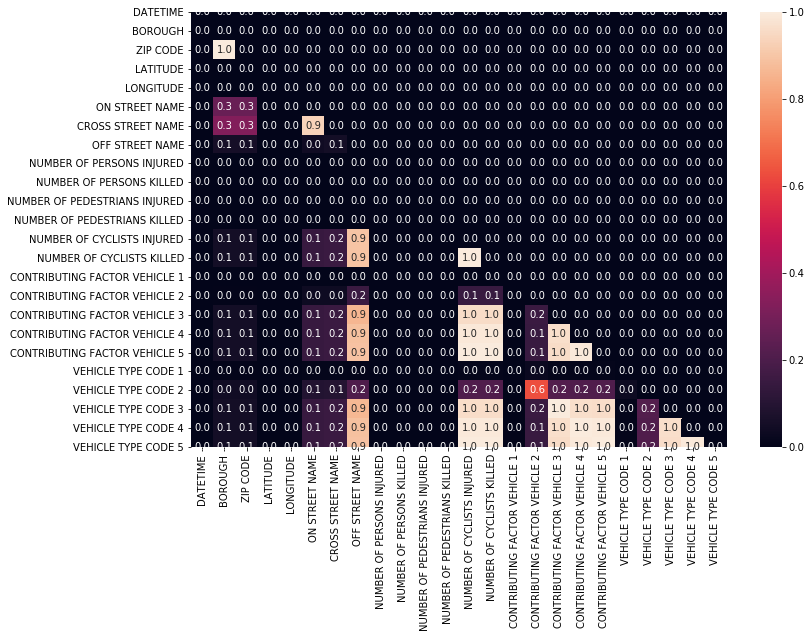

In [150]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(missing_values_frequency_matrix.T, ax=ax, annot=True, fmt='.1f', annot_kws={"size": 10})

## Correlation Heatmap

Computing pearson correlation on missing values matrix 

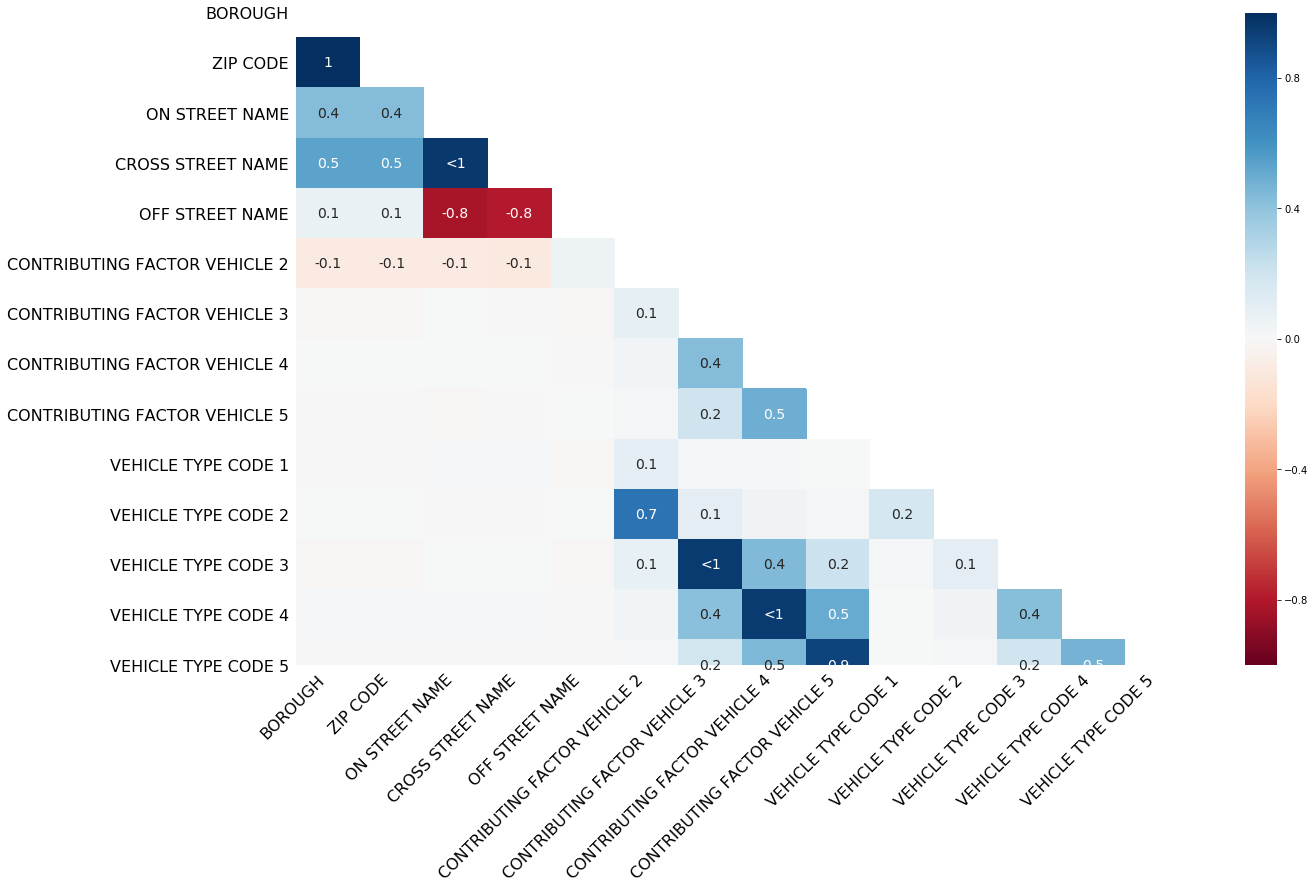

In [49]:
msno.heatmap(df)